In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10), dpi=100)

races = pd.read_csv('../data/races.csv', na_values='\\N')
results = pd.read_csv('../data/results.csv', na_values='\\N')
pit_stops = pd.read_csv('../data/pit_stops.csv',na_values='\\N')

<Figure size 1000x1000 with 0 Axes>

In [2]:
clean_races = races[['raceId', 'year']]
clean_results = results[['raceId', 'driverId', 'position']]
clean_pitstops = pit_stops[['raceId', 'driverId', 'stop']]

clean_races = clean_races[clean_races['year'] >= 2005]
pitstops_clean = clean_pitstops.merge(clean_races[['raceId']],on='raceId',how='inner')

pitstop_counts = pitstops_clean.groupby(['raceId', 'driverId']).size().reset_index(name='num_pitstops')
pitstop_counts.head()

,raceId,driverId,num_pitstops
0,841,1,2
1,841,2,2
2,841,3,1
3,841,4,3
4,841,5,1


In [3]:
merged_pit_results = pitstop_counts.merge(clean_results,on=['raceId', 'driverId'],how='inner')
merged_pit_results = merged_pit_results.dropna(subset=['position'])
merged_pit_results.head()

,raceId,driverId,num_pitstops,position
0,841,1,2,2.0
1,841,2,2,12.0
3,841,4,3,4.0
6,841,13,3,7.0
7,841,15,2,13.0


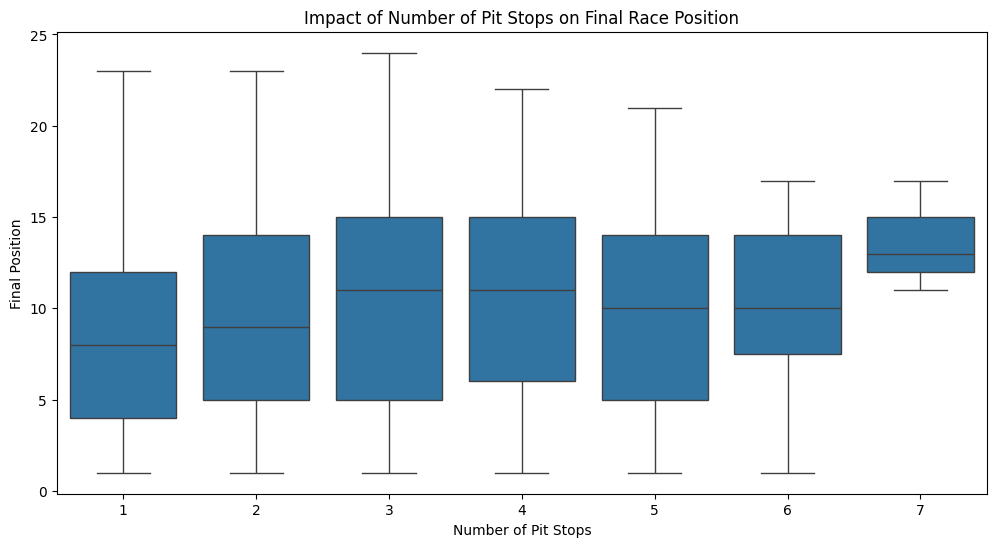

In [4]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=merged_pit_results,x='num_pitstops',y='position')
plt.xlabel('Number of Pit Stops')
plt.ylabel('Final Position')
plt.title('Impact of Number of Pit Stops on Final Race Position')
plt.savefig('../visuals/impact_of_pit_stop_on_final_position.png', dpi=300, bbox_inches='tight')
plt.show()


In [5]:
clean_races2 = races[['raceId', 'year','name']]
clean_races2 = clean_races2[clean_races2['year'] >= 2005]
pitstop_counts = pitstops_clean.groupby(['raceId', 'driverId']).size().reset_index(name='num_pitstops')
merged_df = pitstop_counts.merge(clean_results,on=['raceId', 'driverId'],how='inner')

merged_df = merged_df.merge(clean_races2[['raceId', 'name']],on='raceId',how='inner')

merged_df = merged_df.dropna(subset=['position'])
merged_df.head()

,raceId,driverId,num_pitstops,position,name
0,841,1,2,2.0,Australian Grand Prix
1,841,2,2,12.0,Australian Grand Prix
3,841,4,3,4.0,Australian Grand Prix
6,841,13,3,7.0,Australian Grand Prix
7,841,15,2,13.0,Australian Grand Prix


In [6]:
circuit_counts = merged_df['name'].value_counts()
top_circuits = circuit_counts[circuit_counts >= 10].index

merged_top = merged_df[merged_df['name'].isin(top_circuits)]
merged_top.head()

,raceId,driverId,num_pitstops,position,name
0,841,1,2,2.0,Australian Grand Prix
1,841,2,2,12.0,Australian Grand Prix
3,841,4,3,4.0,Australian Grand Prix
6,841,13,3,7.0,Australian Grand Prix
7,841,15,2,13.0,Australian Grand Prix


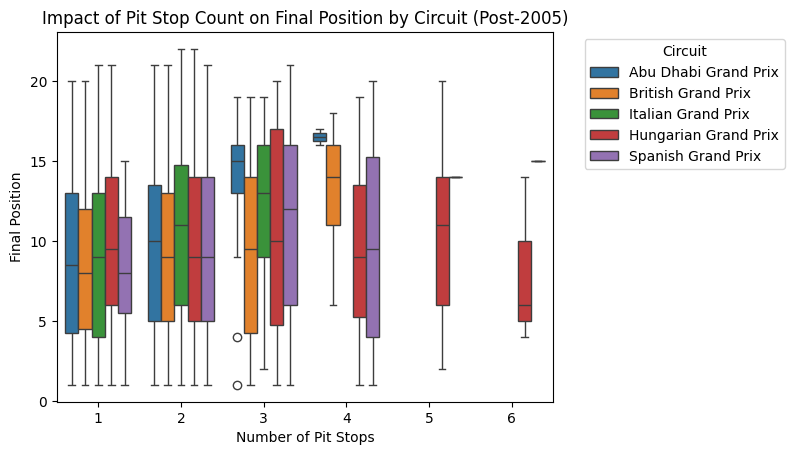

In [ ]:
top_5_circuits = merged_df['name'].value_counts().nlargest(5).index

merged_top_5 = merged_df[merged_df['name'].isin(top_5_circuits)]

sns.boxplot(data=merged_top_5, x='num_pitstops', y='position', hue='name')

plt.xlabel('Number of Pit Stops')
plt.ylabel('Final Position')
plt.title('Impact of Pit Stop Count on Final Position by Circuit (Post-2005)')
plt.savefig('../visuals/impact_of_number_of_pit_stops.png', dpi=300, bbox_inches='tight')
plt.legend(title='Circuit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
